In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

In [2]:
# download MNIST
train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())


In [3]:
batch_size = 100 #num of imgs being processed each iteration
num_iters = 3000
num_epochs = num_iters / (len(train_dataset)/batch_size)
num_epochs = int(num_epochs)
print(num_epochs)


# Load the Data
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

5


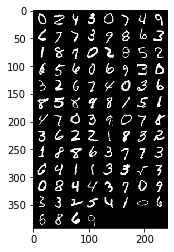

7

In [4]:
classes = [0,1,2,3,4,5,6,7,8,9]
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
for i in range(batch_size):
    classes[labels[i]]
classes[labels[10,]]

In [5]:
class FNN(nn.Module):
    def __init__(self, input_size, hidden_dim, num_classes):
        super(FNN, self).__init__()
        self.f1 = nn.Linear(input_size, hidden_dim)
        self.relu1 = nn.ReLU()
        self.f2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.f3 = nn.Linear(hidden_dim, hidden_dim)
        self.relu3 = nn.ReLU()
        self.f4 = nn.Linear(hidden_dim, num_classes)
        
    def forward(self, x):
        # 1st fully connected layer
        x = self.f1(x)
        x = self.relu1(x)
        
        # 2nd fully connected layer
        x = self.f2(x)
        x = self.relu2(x)
        
        # 3rd fully connected layer
        x = self.f3(x)
        x = self.relu3(x)
        
        x = self.f4(x)
        return x
    
input_size = 28*28*1 #each photo is 28x28 & 1 in channel (B/W)
hidden_dim = 100
num_classes = 10 # output classes == output size
    
model = FNN(input_size, hidden_dim, num_classes)

In [6]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr= 0.1)

In [7]:
iteration = 1
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1,28*28).requires_grad_()
        
        # clear gradients
        optimizer.zero_grad() 
        
        # forward pass
        outputs = model(images)
        
        # calculate loss
        loss = criterion(outputs, labels)
        
        # get grads in wrt to params
        loss.backward()
        
        # optimize and update params
        optimizer.step()
        
        iteration +=1
        
        # report every 500 iterations
        if iteration % 500 == 0:
            correct = 0
            total = 0
            for images, labels in train_loader:
                images = images.view(-1,28*28).requires_grad_()

                #forward
                outputs = model(images)
                
                _, predict = torch.max(outputs.data,1)
                
                # total num of images read
                total += labels.size(0)
                
                # correct label predictions for imgs
                correct += (predict == labels).sum()
                
            accuracy= int(correct)/int(total) *100
            print('iter {} | Loss: {}| Train Accuracy: {}'.format(iteration,
                                                               loss.item(),
                                                               accuracy))

iter 500 | Loss: 0.3469007611274719| Train Accuracy: 90.31833333333333
iter 1000 | Loss: 0.22694288194179535| Train Accuracy: 93.90666666666667
iter 1500 | Loss: 0.08221956342458725| Train Accuracy: 95.77666666666667
iter 2000 | Loss: 0.2618386745452881| Train Accuracy: 96.52666666666667
iter 2500 | Loss: 0.14046697318553925| Train Accuracy: 96.92166666666667
iter 3000 | Loss: 0.11073143035173416| Train Accuracy: 97.91333333333333


In [8]:
# Validate

correct = 0
total = 0 

for images, labels in test_loader:
    images = Variable(images.view(-1,28*28))
    labels = Variable(labels)
    
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data,1)
    
    # total num of imgs passed
    total += labels.size(0)
    # correctly labelled imgs
    correct += (predicted==labels).sum()

accuracy = int(correct) / int(total) * 100

print("Validation Accuracy is ", accuracy)


Validation Accuracy is  96.77
